In [8]:
'''
An imputation method based on ranking and nearest neighbor.
    
Beretta L, Santaniello A. Nearest neighbor imputation algorithms: a critical
evaluation. BMC Med Inform Decis Mak. 2016 Jul 25;16 Suppl 3:74.
'''
#Author: Lorenzo Beretta, lorberimm@hotmail.com

#Adapted by L Kahn; 11/20/18

#Dependencies Installation
#pip install rkNN-imputer, pip install sk-rebate

In [18]:
#How it works using a dummy array
#pip install rkNN_imputer, skrebate
import numpy as np
import pandas as pd
from rkNN_imputer.rkNN import rkNN

dummy = np.array ((["0.2", "0.4", "5", "0.4", "6"],
                ["?", "0.4", "8", "0.5", "8"],
                ["0.1", "0.8", "3", "0.2", "6"],
                ["0.3", "0.2", "?", "0.1", "7"],
                ["0.2", "0.9", "3", "0.2", "4"]))

imp = rkNN ()
imp.fit (dummy)
imputed_dummy = imp.transform (dummy)

# show orignal and imputed dataset
print (dummy)
print ("")
print (imputed_dummy)

None
None
[['0.2' '0.4' '5' '0.4' '6']
 ['?' '0.4' '8' '0.5' '8']
 ['0.1' '0.8' '3' '0.2' '6']
 ['0.3' '0.2' '?' '0.1' '7']
 ['0.2' '0.9' '3' '0.2' '4']]

[[0.2 0.4 5.  0.4 6. ]
 [0.1 0.4 8.  0.5 8. ]
 [0.1 0.8 3.  0.2 6. ]
 [0.3 0.2 4.  0.1 7. ]
 [0.2 0.9 3.  0.2 4. ]]


## Research Problem: 

### Can we predict coffee rust amount using temperature, rain, production and futures data from Brasil?

In [4]:
#Now let's try it with real data

#Import Coffee Rust Data

#1578 weekly observations from Coffee-Rust in Brasil from December 1,1993-July 30, 2018
#Missing 48% of rust data 
#Use kNN imputation to fill in this missing data 

#Data Acquisition described at: https://github.com/thedatalass.
 
import pandas as pd
df = pd.read_csv("brasil_imputed.csv")
df.head()

,Date,Rust,Temp,Rainfall,Production,Futures
0,12/1/1993,0.0,25.7498,208.841,2347.25,0.7865
1,12/8/1993,0.0,25.7498,208.841,2347.25,0.7715
2,12/15/1993,0.0,25.7498,208.841,2347.25,0.7980
3,12/22/1993,0.0,25.7498,208.841,2347.25,0.7630
4,12/29/1993,0.0,25.7498,208.841,2347.25,0.7490


In [5]:
#Delete date column
brasil = df.drop(df.columns[0], axis=1)
brasil.head()

,Rust,Temp,Rainfall,Production,Futures
0,0.0,25.7498,208.841,2347.25,0.7865
1,0.0,25.7498,208.841,2347.25,0.7715
2,0.0,25.7498,208.841,2347.25,0.7980
3,0.0,25.7498,208.841,2347.25,0.7630
4,0.0,25.7498,208.841,2347.25,0.7490


In [71]:
brasil.drop(brasil.tail(1).index,inplace=True)
brasil.head()

,Rust,Temp,Rainfall,Production,Futures
0,0.0,25.7498,208.841,2347.25,0.7865
1,0.0,25.7498,208.841,2347.25,0.7715
2,0.0,25.7498,208.841,2347.25,0.7980
3,0.0,25.7498,208.841,2347.25,0.7630
4,0.0,25.7498,208.841,2347.25,0.7490


In [72]:
#Convert pandas dataframe as numpy array
array = brasil.values
array

array([[0.00000e+00, 2.57498e+01, 2.08841e+02, 2.34725e+03, 7.86500e-01],
       [0.00000e+00, 2.57498e+01, 2.08841e+02, 2.34725e+03, 7.71500e-01],
       [0.00000e+00, 2.57498e+01, 2.08841e+02, 2.34725e+03, 7.98000e-01],
       ...,
       [5.00000e+01, 2.56557e+01, 2.38866e+02, 2.27383e+03, 9.27000e-01],
       [5.00000e+01, 2.56557e+01, 2.38866e+02, 2.27383e+03, 9.32500e-01],
       [5.00000e+01, 2.56557e+01, 2.38866e+02, 2.27383e+03, 9.27500e-01]])

In [30]:
#import numpy as np
#from rkNN_imputer.rkNN import rkNN

#imp = rkNN ()
#imp.fit (array)
#imputed_array = imp.transform (array)

In [31]:
#Let's look at just the array
#imputed_array

In [32]:
#Convert imputed values back to pandas dataframe

#Code adapted from https://www.ritchieng.com/creating-dataframe-from-objects/
# columns
#columns_new = ['temp', 'rain','production','futures','rust']

# pass in array and columns
#brasil_new = pd.DataFrame(imputed_array, columns=columns_new)
#brasil_new.head()

In [33]:
#Save imputed dataframe "brasil_new" to CSV
brasil.to_csv("brasil.csv")

Code to combine date from 'df' dataframe with 'brasil_new' dataframe

brasil_new['Date']=df.sum(axis=1)

In [73]:
#But do we need the date for our models???
#Let's try Exploratory Data Analysis without dates first

#CMD - pip install pytz, pip install pandas, pip install matplotlib, pip install numpy
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [74]:
#Basic statistics - Note we added ? values to any rust > 5
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rust,1584.0,14.732570,12.765871,0.0000,3.0000,13.4000,20.00000,50.0000
Temp,1584.0,25.535762,0.975633,22.8491,24.7720,25.7505,26.20360,27.3725
Rainfall,1584.0,144.498528,69.670390,6.0000,75.5808,141.8400,203.72700,292.0630
Production,1584.0,3390.330928,935.568940,1505.0000,2433.0800,3273.4200,4250.00000,5000.0000
Futures,1584.0,1.218709,0.481500,0.4250,0.8525,1.1815,1.43675,3.1480


Text(0.5, 1.0, 'Exploring Coffee Rust, Production and Futures')

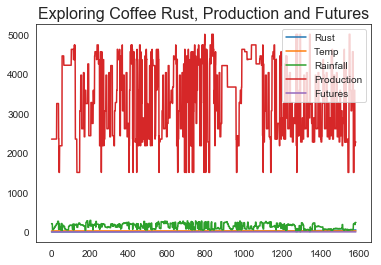

In [75]:
df.plot();
plt.title("Exploring Coffee Rust, Production and Futures", fontsize=16)

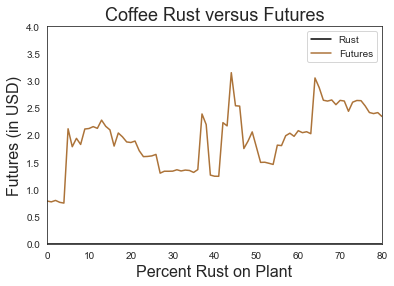

In [94]:
df['Rust'].plot(color='black')
df['Futures'].plot(color='#ac7339')
#Set x-axis range from 0-50
plt.xlim(0,80)
plt.ylim(0,4)
#Add xaxis label
plt.xlabel("Percent Rust on Plant", fontsize=16)
#Add yaxis label
plt.ylabel("Futures (in USD)", fontsize=16)
plt.title("Coffee Rust versus Futures", fontsize=18)
plt.legend()

Text(0.5,1,'Coffee Rust Histogram')

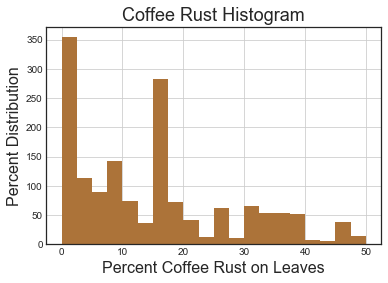

In [12]:
#Histogram of Coffee Rust
df['rust'].hist(bins=20, color='#ac7339')
plt.xlabel("Percent Coffee Rust on Leaves",fontsize=16)
plt.ylabel("Percent Distribution",fontsize=16)
plt.title("Coffee Rust Histogram",fontsize=18)

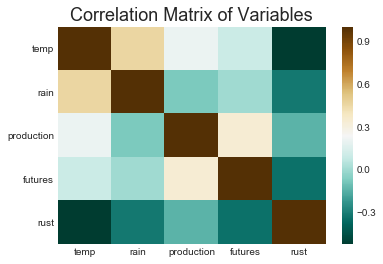

In [13]:
import seaborn as sns
ax = plt.axes()
corr = df.corr()
#The default colors were changed to 'BrBG_r' to match better with the 
#browns in the other visualizations.
sns.heatmap(corr, cmap='BrBG_r',xticklabels=corr.columns.values, yticklabels=corr.columns.values)
#Label title
ax.set_title('Correlation Matrix of Variables',fontsize=18)
plt.show()

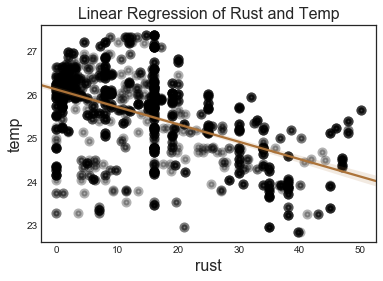

In [14]:
#Next, we could use Seaborn library for regression visualization of Rust versus Production
ax = plt.axes()
ax.set_title('Linear Regression of Rust and Temp',fontsize=16)
ax.set_xlabel('Percent Rust on Plant',fontsize=16)
ax.set_ylabel('Production in 1000-60kg bags',fontsize=16)
sns.regplot(x=df['rust'],color='#ac7339', y=df['temp'],scatter_kws={"color":"black","alpha":0.3,"lw":4} )
plt.show()

In [95]:
#Let's use a pivot table to group the data by Rust percent.
pivot_df = df.pivot_table(index=['Rust'])
pivot_df.head()

,Futures,Production,Rainfall,Temp
Rust,,,,
0.000000,2.000874,3434.275385,130.456282,25.442776
0.166667,1.816250,4452.330000,112.547000,26.642000
0.333333,1.429000,4730.330000,195.832000,26.397100
0.400000,1.444750,4544.290000,195.832000,26.397100
0.500000,1.425000,4558.170000,169.603000,25.717300


In [96]:
#Let's see error and slope of each variable
import numpy as np
coefficients, residuals, _, _, _ = np.polyfit(range(len(pivot_df.index)),pivot_df,1,full=True)
mse = residuals[0]/(len(pivot_df.index))
nrmse = np.sqrt(mse)/(pivot_df.max() - pivot_df.min())

#Print results
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope [-2.51786375e-03 -3.55573121e+00 -5.14376898e-01 -1.02669507e-02]
NRMSE: Futures       0.169462
Production    0.000114
Rainfall      0.001455
Temp          0.087758
dtype: float64


Now that we've done some EDA, let's try a multiperceptron neural network

In [97]:
#Let's look at the data again
brasil.tail()

,Rust,Temp,Rainfall,Production,Futures
1578,48.0,25.1970,186.506,2179.00,2.1120
1579,48.0,25.1970,186.506,2179.00,2.0993
1580,50.0,25.6557,238.866,2273.83,0.9270
1581,50.0,25.6557,238.866,2273.83,0.9325
1582,50.0,25.6557,238.866,2273.83,0.9275


### Now that Exploratory Data Analysis is Finished, let's move onto Machine Learning Models

In [3]:
#Note in version 0.20 change syntax 'from sklearn.cross_validation import train_test_split' to
#'from sklearn.model_selection import train_test_split'

from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation
import sklearn.metrics as metrics

In [6]:
#Yet another way to define X, Y variables. 

X = brasil.values[:, 1:4] #input features - Rainfall, Temperature, Production, Futures
y = brasil.values[:, 1] #target output feature - Rust

#To return a dataframe
X =brasil.iloc[:, 1:4]
y =brasil.iloc[:, 0]

#Delete date column from pandas 'df'
#dfnew = df.drop(['Date'], axis=1)

In [1]:
#Define variables 

X = brasil.drop('Rust',axis=1)
y = brasil['Rust']

NameError: name 'brasil' is not defined

In [7]:
#Let's split the variables into training and test (test size = 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# Next we need to do Feature Scaling since we have continuous variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression is a Good Starting Place

In [10]:
from sklearn.linear_model import LogisticRegression

#Fit a Logistic Regression model to the data
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

#Predicted Rust Values
LogRegrRust = logistic.predict(X)

C:\Users\laura.kahn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

- Next let's try Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

DTregressor = DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0)
DTregressor.fit(X_train,y_train)

#Predicted Rust Values
DTRegrRust = DTregressor.predict(X)

### Since the data is non-linear, let's try an Artificial Neural Network

In [26]:
#6 neurons & 5 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 relu:', MSE)

MSE MLP 65 relu: 56.322109327594376


In [29]:
#Predicted Rust Values
MLPRust = mlp.predict(X)

In [31]:
#Convert array to dataframe
#LRdf = pd.DataFrame(LogRegrRust, columns=['LogRegr Predicted'])
DTdf = pd.DataFrame(DTRegrRust, columns=['DTRegr Predicted'])
MLPdf = pd.DataFrame(MLPRust, columns=['MLPRegr Predicted'])

In [108]:
LRdf.head()

,LogRegr Predicted
0,11.833333
1,11.833333
2,11.833333
3,11.833333
4,11.833333


In [109]:
#Combine all three dataframes
combined = [LRdf, DTdf, MLPdf]
result = pd.concat(combined, axis=1)
result.head()

,LogRegr Predicted,DTRegr Predicted,MLPRegr Predicted
0,11.833333,3.111111,11392.231934
1,11.833333,3.111111,11392.231934
2,11.833333,3.111111,11392.231934
3,11.833333,3.111111,11392.231934
4,11.833333,3.111111,11392.231934


In [55]:
#Ground Truth- Rust = y values- how to convert object y to dataframe?
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1553    47
1554    47
1555    47
1556    47
1557    47
1558    47
1559    47
1560    47
1561    47
1562    47
1563    47
1564    47
1565    47
1566    47
1567    47
1568    47
1569    47
1570    48
1571    48
1572    48
1573    48
1574    48
1575    48
1576    48
1577    48
1578    48
1579    48
1580    50
1581    50
1582    50
Name: Rust, Length: 1583, dtype: object

Great Tutorials on implementing NN: https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

In [13]:
#Let's try a Multilayer perceptron (MLPRegressor) Neural Network classifier because why not?

from sklearn.neural_network import MLPRegressor
#Create MLP model with 4 neurons and 4 layers. 
#Chose 4 since that's the number of features.
#Do we need this many neurons for a low mean log loss?

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(4,4,4,4), random_state=1,max_iter=1500)

In [14]:
#Fit training data to model
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 4, 4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
predictions = mlp.predict(X_test)

In [16]:
y_true = y_test
y_pred = predictions

In [17]:
#Since this is a regression problem, let's use MSE (mean squared error) for model measurement
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 44:', MSE)

MSE MLP 44: 111.93933967773258


In [33]:
#Now for comparison, create MLP model with 4 neurons and 6 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(4,4,4,4,4,4), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 4 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 46:', MSE)

MSE MLP 46: 77.51324336385208


In [34]:
#Now for comparison, create MLP model with 6 neurons and 4 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 4 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 64:', MSE)

MSE MLP 64: 56.77084781732868


In [48]:
#6 neurons & 5 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 relu:', MSE)

MSE MLP 65 relu: 47.699439892111336


In [50]:
#Let's try to tune the hyperparameters

#Change the Solver

#6 neurons & 5 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='sgd', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 relu sgd:', MSE)

MSE MLP 65 relu sgd: 81.84065784319688


In [51]:
#6 neurons & 5 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='adam', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 relu adam:', MSE)

MSE MLP 65 relu adam: 75.9513082189304


In [46]:
#Change the activation function hyperparameter

from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='logistic',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 logistic:', MSE)

MSE MLP 65 logistic: 89.79101625917413


In [47]:
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='tanh',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 tanh:', MSE)

MSE MLP 65 tanh: 54.40638426464971


In [43]:
#6 neurons & 6 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 66:', MSE)

MSE MLP 66: 77.34254433245755


In [42]:
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(5,5,5), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 5 neurons, 3 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 53:', MSE)

MSE MLP 53: 60.23538622642504


In [35]:
#Now for comparison, create MLP model with 6 neurons and 2 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 4 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 62:', MSE)

MSE MLP 62: 86.4030203945308


In [36]:
#Now for comparison, create MLP model with 4 neurons and 2 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(4,4), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 4 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 42:', MSE)

MSE MLP 42: 81.20429642962867


In [20]:
#Let's compare to Logistic Regression as baseline

#DATA PREPROCESSING

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [21]:
#Check the datatype for y_train variable
y_train.dtype

dtype('float64')

In [22]:
from sklearn.linear_model import LogisticRegression

#Fit a Logistic Regression model to the data
logistic = LogisticRegression()
logistic.fit(X_train, encoded)

C:\Users\laura.kahn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laura.kahn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, logistic.predict(X_test))
print ('MSE Logistic Regression:', MSE)

MSE Logistic Regression: 6869.224920562301


Smaller MSE for Multi-layer perceptron so this is a good starting place on model selection.

In [26]:
#Now let's try a decision tree regressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0)
regressor.fit(X_train,encoded)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [53]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, regressor.predict(X_test))
print('MSE Decision Tree Regressor:', MSE)

MSE Decision Tree Regressor: 6339.146409381808


### Visualize the Mean Squared Error of the Models

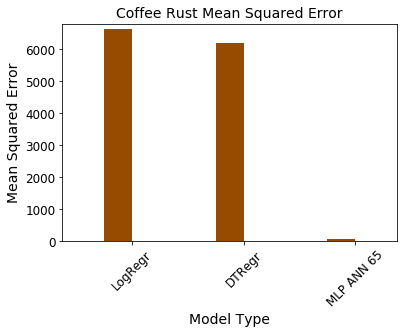

In [42]:
#Plot Classifier Percent Prediction Errors. All classifiers have less than 1% error which makes them pretty super
#classifiers.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

labels = ['LogRegr', 'DTRegr', 'MLP ANN 65']
#Rotate Labels to make them readable
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
#add data
#Note the negative value (direction of error is not important so these values have been changed to positive.)
data = [6619.78, 6179.33, 54.41]

xlocations = np.array(range(len(data)))+0.5
width = 0.25
bar(xlocations, data, width=width, color='#964B00')
yticks(fontsize=12)
xticks(xlocations+ width/2, labels, fontsize=12)
xlim(0, xlocations[-1]+width*2)

#Set limit to y axis
plt.ylim(ymax = 6800, ymin=0)
#Add title to plot
title('Coffee Rust Mean Squared Error', fontsize=14)
plt.xlabel("Model Type",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
show()

In [18]:
from sklearn import model_selection

#Goodness of Fit, R squared
scoring = 'r2'

goodness_MLP = model_selection.cross_val_score(mlp, X, y, scoring=scoring)
goodness_MLP

C:\Users\laura.kahn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([-113.57165911,   -0.88114066,   -5.99050149])

In [27]:
scoring = 'r2'

goodness_DTregr = model_selection.cross_val_score(regressor, X, y, scoring=scoring)
goodness_DTregr

C:\Users\laura.kahn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([-85.19287375, -10.40930856,  -6.20851164])